# Stock Price Prediction using Time Series Analysis

## Description:
This project focuses on predicting stock prices using time series analysis techniques. Time series forecasting plays a crucial role in financial markets, assisting investors and traders in making informed decisions. In this project, we leverage historical stock market data of Bajaj Finance Ltd. (BAJFINANCE) to build an Auto ARIMA model for predicting the Volume-Weighted Average Price (VWAP) of the stock.

The project consists of the following key steps:

1. Data Acquisition: We obtain historical stock market data of Bajaj Finance Ltd. (BAJFINANCE) from a CSV file.

2. Data Preprocessing: We preprocess the data by handling missing values and ensuring data consistency. This step is essential for preparing the data for analysis.

3. Feature Engineering: We engineer lag features and rolling statistics such as rolling mean and rolling standard deviation. These features provide valuable insights into the trends and patterns in the data, which can improve the forecasting model's accuracy.

4. Model Training: We split the preprocessed data into training and test sets. The training set is used to fit an Auto ARIMA model, a state-of-the-art algorithm for time series forecasting. We include exogenous variables such as lag features in the model to capture additional information that may influence stock prices.

5. Model Evaluation: We evaluate the performance of the trained model using metrics such as Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). These metrics quantify the difference between the actual and predicted stock prices, providing insights into the model's accuracy.

6. Results Visualization: We visualize the actual and predicted stock prices using line plots. This visual representation allows us to compare the model's predictions with the ground truth and assess its effectiveness in capturing the underlying patterns in the data.

Overall, this project demonstrates the application of time series analysis techniques in predicting stock prices and provides a framework for building forecasting models that can assist investors and traders in making more informed decisions in financial markets.

# Data Acquisition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read Data
df = pd.read_csv('BAJFINANCE.csv')
df.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [3]:
df.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

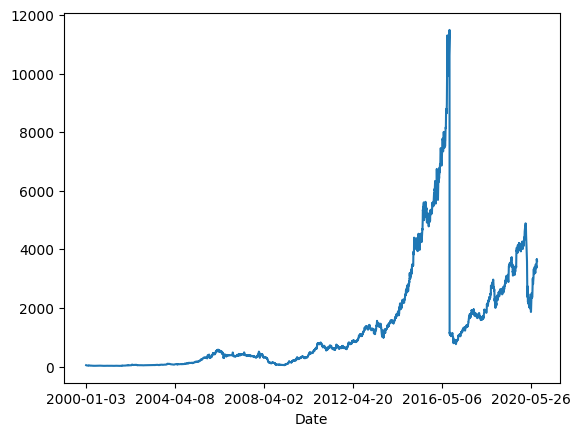

In [4]:
# Plotting our target variable 'VWAP' over time
df['VWAP'].plot()

Here we can observe some kind of Seasonality

# Data Preprocessing

In [5]:
df.shape

(5070, 14)

In [6]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [7]:
# Drop NaN values
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [9]:
df.shape

(2291, 14)

# Feature Engineering

In [10]:
data = df.copy()

In [11]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [12]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [14]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [87]:
for feature in lag_features:
  data[feature+'_rolling_mean_3']=data[feature].rolling(window=window1).mean()
  data[feature+'_rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [88]:
for feature in lag_features:
  data[feature+'_rolling_std_3']=data[feature].rolling(window=window1).std()
  data[feature+'_rolling_std_7']=data[feature].rolling(window=window2).std()

In [ ]:
data.head()

In [91]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Volume_rolling_std_3',
       'Volume_rolling_std_7', 'Turnover_rolling_std_3',
       'Turnover_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7'],
      dtype='object')

In [19]:
data.shape

(2291, 34)

In [92]:
data.isna().sum()

Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                     0
Deliverable Volume         0
%Deliverble                0
High_rolling_mean_3        2
High_rolling_mean_7        6
Low_rolling_mean_3         2
Low_rolling_mean_7         6
Volume_rolling_mean_3      2
Volume_rolling_mean_7      6
Turnover_rolling_mean_3    2
Turnover_rolling_mean_7    6
Trades_rolling_mean_3      2
Trades_rolling_mean_7      6
High_rolling_std_3         2
High_rolling_std_7         6
Low_rolling_std_3          2
Low_rolling_std_7          6
Volume_rolling_std_3       2
Volume_rolling_std_7       6
Turnover_rolling_std_3     2
Turnover_rolling_std_7     6
Trades_rolling_std_3       2
Trades_rolling_std_7       6
dtype: int64

In [93]:
data.dropna(inplace=True)

In [94]:
data.isna().sum()

Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                     0
Deliverable Volume         0
%Deliverble                0
High_rolling_mean_3        0
High_rolling_mean_7        0
Low_rolling_mean_3         0
Low_rolling_mean_7         0
Volume_rolling_mean_3      0
Volume_rolling_mean_7      0
Turnover_rolling_mean_3    0
Turnover_rolling_mean_7    0
Trades_rolling_mean_3      0
Trades_rolling_mean_7      0
High_rolling_std_3         0
High_rolling_std_7         0
Low_rolling_std_3          0
Low_rolling_std_7          0
Volume_rolling_std_3       0
Volume_rolling_std_7       0
Turnover_rolling_std_3     0
Turnover_rolling_std_7     0
Trades_rolling_std_3       0
Trades_rolling_std_7       0
dtype: int64

In [95]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Volume_rolling_std_3',
       'Volume_rolling_std_7', 'Turnover_rolling_std_3',
       'Turnover_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7'],
      dtype='object')

# Model Training

In [96]:
# Split Data (2291, 34)
train_size = 1800
train_data = data[0:1800]
test_data = data[1800:]

In [ ]:
train_data

In [ ]:
test_data

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [98]:
from pmdarima.arima import auto_arima

In [99]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Volume_rolling_std_3',
       'Volume_rolling_std_7', 'Turnover_rolling_std_3',
       'Turnover_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7'],
      dtype='object')

In [100]:
# Fit Model
rolling_features = ['High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Volume_rolling_std_3',
       'Volume_rolling_std_7', 'Turnover_rolling_std_3',
       'Turnover_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7']

In [101]:
# Building the ARIMA Model
# model = auto_arima(y_train, exogenous=X_train)
model = auto_arima(y=train_data['VWAP'], exogenous=train_data[rolling_features])

In [102]:
# Fit the model with exogenous variables
# model.fit(y_train, exogenous=X_train)
model.fit(train_data['VWAP'], exogenous=train_data[rolling_features])

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [103]:
# Forecasting
# forecast = model.predict(n_periods=len(X_test), exogenous=X_test)
forecast = model.predict(n_periods=len(test_data[rolling_features]), exogenous=test_data[rolling_features])
forecast

1800    2534.22
1801    2534.22
1802    2534.22
1803    2534.22
1804    2534.22
         ...   
2274    2534.22
2275    2534.22
2276    2534.22
2277    2534.22
2278    2534.22
Length: 479, dtype: float64

# Model Evaluation

In [104]:
# Ensure index alignment
forecast.index = test_data.index

In [105]:
forecast.index

Index(['2018-09-21', '2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27',
       '2018-09-28', '2018-10-01', '2018-10-03', '2018-10-04', '2018-10-05',
       ...
       '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-24',
       '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-31'],
      dtype='object', name='Date', length=479)

In [106]:
# Assign forecasted values to 'Forecast_ARIMA' column
test_data['Forecast_ARIMA'] = forecast

In [107]:
test_data['Forecast_ARIMA']

Date
2018-09-21    2534.22
2018-09-24    2534.22
2018-09-25    2534.22
2018-09-26    2534.22
2018-09-27    2534.22
               ...   
2020-08-25    2534.22
2020-08-26    2534.22
2020-08-27    2534.22
2020-08-28    2534.22
2020-08-31    2534.22
Name: Forecast_ARIMA, Length: 479, dtype: float64

In [108]:
# Calculate evaluation metrics to see Accuracy of our model
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(test_data['VWAP'], test_data['Forecast_ARIMA']))
mae = mean_absolute_error(test_data['VWAP'], test_data['Forecast_ARIMA'])

print('RMSE:', rmse)
print('MAE:', mae)

RMSE: 979.4614621816197
MAE: 770.6754070981214


# Results Visualization

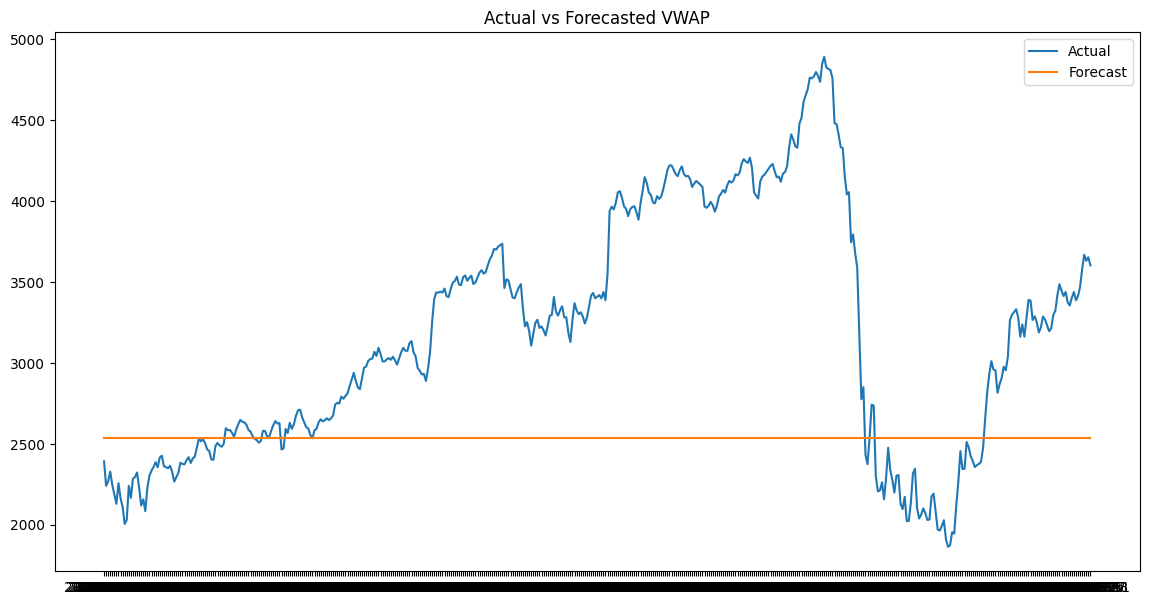

In [109]:
# Plot actual vs forecasted values
plt.figure(figsize=(14, 7))
plt.plot(test_data['VWAP'], label='Actual')
plt.plot(test_data['Forecast_ARIMA'], label='Forecast')
plt.legend()
plt.title('Actual vs Forecasted VWAP')
plt.show()